# Mental Health Analysis

1 in 5 people live with a mental health condition. And across the population, 1 in every 25 adults is living with a serious mental health condition such as schizophrenia, bipolar disorder or long-term recurring major depression. As with other serious illnesses, mental illness is not your fault or that of the people around you, but widespread misunderstandings about mental illness remain.

I'm curious to understand more of the demographics surrounding mental health. There have been studies already done that show that some mental illnesses arise due to situational circumstances. 


This project is meant to analyze the different mental illnesses by region of the US, gender and ethnicity in order to see if a pattern emerges. 

## Data Dictionary

The following table shows the data set used for this analysis 

| Field | Description |
| :--- | :--- |
| ID | The identifier of a specific person |
| State | State in the US |
| Ethnicity | White, Black, Hispanic, Asian or Other |
| Gender | Male, Female |
| Illness | Anxiety, Depression, Eating Disorder, OCD, ADHD, Schizophrenia, Bipolar, Other |


## Framing Questions
* Is there a correlation between gender and mental illness?
* Is there a corrleation between mental illness and State?
* Is there a correlation between mental illness and ethnicity?

## Important Links

* [Final Report Notebook](report.ipynb)
* [EDA Notebook](eda.ipynb)
* [Dataset](https://www.kaggle.com/bobnis/us-stats-meillness) - Link to Dataset on Kaggle
* [NAMI](https://nami.org/Home) - Resources for Mental Health
* [Fact Sheet] (Mental-Health-Facts-for-Diverse-Populations.pdf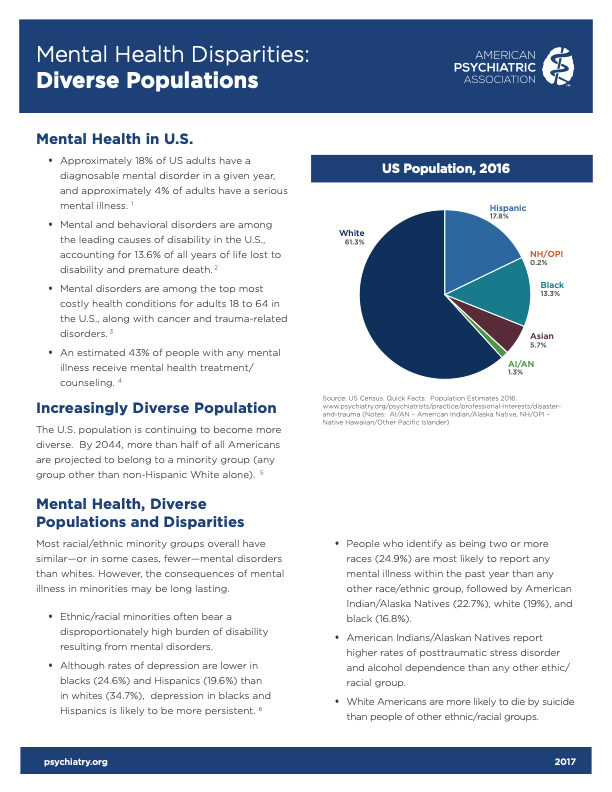

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


## Step 1: Compile data

I had to combine two separate data sets. Luckily, the columns are the same for both, so it was an easy join.

In [2]:
mh_1 = pd.read_csv('data/mentalillness_data1.csv')
mh_2 = pd.read_csv('data/mentalillness_data2.csv')
mh = mh_1.append(mh_2)
print(f'There are {mh.shape[0]} rows and {mh.shape[1]} columns of unmunged data.');

There are 1000000 rows and 5 columns of unmunged data.


## Step 2: Munge the Data
**Data Types**

There's nothing too exciting about the different data types. The data is made up of entirely of strings, except for the unique ID.

However, there are some null values in the data that need to be removed. There are more than 9,000 nulls in this data set that were removed.

In [3]:
print(mh_1.info())
#this is used to get all columns and data types
print(mh_2.info())
print(mh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
id           500000 non-null int64
state        500000 non-null object
ethnicity    500000 non-null object
gender       454614 non-null object
illness      500000 non-null object
dtypes: int64(1), object(4)
memory usage: 19.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
id           500000 non-null int64
state        500000 non-null object
ethnicity    500000 non-null object
gender       454709 non-null object
illness      500000 non-null object
dtypes: int64(1), object(4)
memory usage: 19.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 499999
Data columns (total 5 columns):
id           1000000 non-null int64
state        1000000 non-null object
ethnicity    1000000 non-null object
gender       909323 non-null object
illness      1000000 non-null object
dtypes: int64(1)

In [4]:
pd.DataFrame(mh.dtypes, columns=['DataTypes'])


,DataTypes
id,int64
state,object
ethnicity,object
gender,object
illness,object


In [5]:
mh.dropna(inplace = True)
print(f'Now there are {mh.shape[0]} rows and {mh.shape[1]} columns of munged data.');

Now there are 909323 rows and 5 columns of munged data.


## Step 3: Analyze the Data
**Mental Illness Types**

I first wanted to see which mental health condition was most prevalent overall. Depression and Anxiety seemed to be almost half of all cases, with Schizophrenia with the lowest number.

In [6]:
print('The top 5 illnesses with the most cases are:')
mh['illness'].value_counts().head()


The top 5 illnesses with the most cases are:


Depression          204293
Anxiety Disorder    203915
Eating Disorder     122557
ADHD                102253
OCD                 102245
Name: illness, dtype: int64

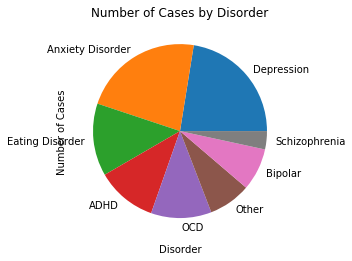

In [42]:
mh['illness'].value_counts().plot(kind='pie')
plt.ylabel('Number of Cases')
plt.xlabel('Disorder')
plt.title('Number of Cases by Disorder');

**Mental Illness by State**


So now that we've looked at overall mental health cases, I wanted to see if some states had more cases than others. For the most part, every state had a significant amount of cases, but Texas had the most by just a handful. Therefore, I wanted to break it down further to see if some states had higher occurences of certain illnesses than others.

In [8]:
print(f"The top 5 states with the most cases are:")
mh['state'].value_counts().head()


The top 5 states with the most cases are:


Texas        18476
Maine        18448
Wyoming      18443
Tennessee    18409
Arkansas     18386
Name: state, dtype: int64

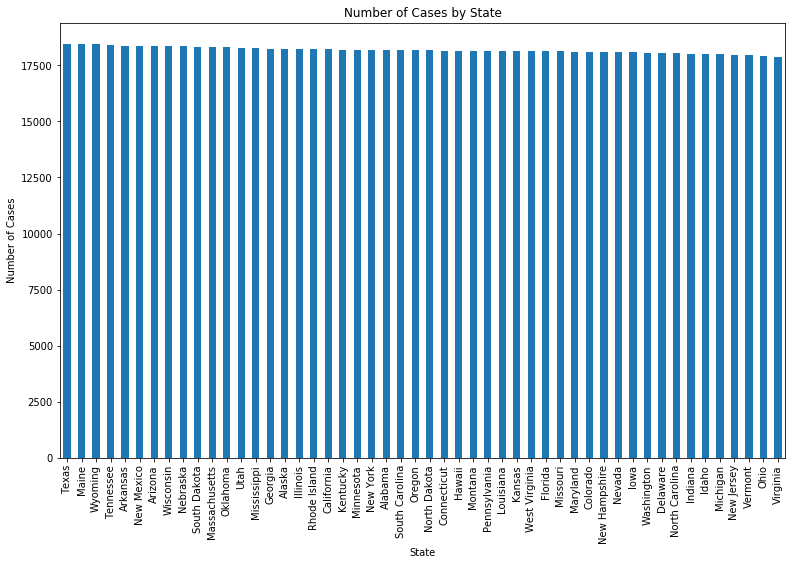

In [41]:
mh['state'].value_counts().plot(kind='bar', figsize=(13,8));
plt.ylabel('Number of Cases')
plt.xlabel('State')
plt.title('Number of Cases by State');

By using the *groupby* and *loc* functions, I was able to look more in depth at the data. A function would be a nice addition here, time permitting, I will attempt that. But for now, from the data, I can see derive the following:
* South Dakota has the highest number of cases of Depression
* Arkansas has the highest number of cases of Anxiety Disorder
* Illinois had the highest number of cases of Schizophrenia
* Rhode Island had the highest number of cases of Eating Disorders (followed closely by Texas!)

In [10]:
illness=mh['illness'].unique()
mh_by_disorder = mh.groupby(['illness','state']) \
                .count() 

mh_by_disorder.loc['Depression'].sort_values(by='id', ascending=False).head()

,id,ethnicity,gender
state,,,
South Dakota,4251,4251,4251
Mississippi,4222,4222,4222
Arizona,4216,4216,4216
Oklahoma,4214,4214,4214
Oregon,4210,4210,4210


In [11]:
mh_by_disorder.loc['Anxiety Disorder'].sort_values(by='id', ascending=False).head()

,id,ethnicity,gender
state,,,
Arkansas,4241,4241,4241
Texas,4229,4229,4229
Wisconsin,4204,4204,4204
Louisiana,4152,4152,4152
South Dakota,4149,4149,4149


In [12]:
mh_by_disorder.loc['Schizophrenia'].sort_values(by='id', ascending=False).head()

,id,ethnicity,gender
state,,,
Illinois,654,654,654
Wisconsin,654,654,654
Delaware,651,651,651
Idaho,650,650,650
New Mexico,645,645,645


In [13]:
mh_by_disorder.loc['Eating Disorder'].sort_values(by='id', ascending=False).head()

,id,ethnicity,gender
state,,,
Rhode Island,2568,2568,2568
Texas,2564,2564,2564
Arizona,2555,2555,2555
South Carolina,2517,2517,2517
Hawaii,2505,2505,2505


**Mental Illness by Ethnicity**


This is interesting to me because while some of the following data may be accurate, other studies have indicated that people from racial/ethnic minority groups are less likely to receive mental health care. For example, in 2015, among adults with any mental illness, 48% of whites received mental health services, compared with 31% of blacks and Hispanics, and 22% of Asians.
From this data set, the following can be determined:
* Asians and Blacks mostly suffer from Anxiety followed closely by Depression
* Whites and Hispanics suffer mostly from Depression, followed closely by Anxiety

More data is needed to thoroughly understand this though.

In [14]:
print('The top 3 ethnicities with the most cases are:')
mh['ethnicity'].value_counts().head(3)

The top 3 ethnicities with the most cases are:


white       487793
hispanic    162138
black       161811
Name: ethnicity, dtype: int64

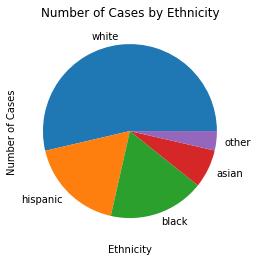

In [39]:
mh['ethnicity'].value_counts().plot(kind='pie')
plt.ylabel('Number of Cases')
plt.xlabel('Ethnicity')
plt.title('Number of Cases by Ethnicity');

In [16]:
mh_by_ethnicity = mh.groupby(['ethnicity','illness']) \
                .count() 

mh_by_ethnicity.loc['asian'].sort_values(by='id', ascending=False)


,id,state,gender
illness,,,
Anxiety Disorder,14515,14515,14515
Depression,14481,14481,14481
Eating Disorder,8724,8724,8724
OCD,7489,7489,7489
ADHD,7213,7213,7213
Bipolar,5169,5169,5169
Other,5125,5125,5125
Schizophrenia,2197,2197,2197


In [17]:
mh_by_ethnicity.loc['white'].sort_values(by='id', ascending=False)


,id,state,gender
illness,,,
Depression,109713,109713,109713
Anxiety Disorder,109343,109343,109343
Eating Disorder,66080,66080,66080
OCD,54826,54826,54826
ADHD,54682,54682,54682
Bipolar,38376,38376,38376
Other,38374,38374,38374
Schizophrenia,16399,16399,16399


In [18]:
mh_by_ethnicity.loc['black'].sort_values(by='id', ascending=False)


,id,state,gender
illness,,,
Anxiety Disorder,36467,36467,36467
Depression,36097,36097,36097
Eating Disorder,21657,21657,21657
ADHD,18195,18195,18195
OCD,18155,18155,18155
Other,12910,12910,12910
Bipolar,12667,12667,12667
Schizophrenia,5663,5663,5663


In [19]:
mh_by_ethnicity.loc['hispanic'].sort_values(by='id', ascending=False)


,id,state,gender
illness,,,
Depression,36585,36585,36585
Anxiety Disorder,36240,36240,36240
Eating Disorder,21783,21783,21783
ADHD,18475,18475,18475
OCD,18087,18087,18087
Bipolar,12835,12835,12835
Other,12669,12669,12669
Schizophrenia,5464,5464,5464


**Mental Illness by Gender**

When it comes to mental illness, the genders are different: Women are more likely to be diagnosed with anxiety or depression, while men tend toward substance abuse or antisocial disorders. (Future data analysis on this one! Adding another column for substance abuse, and introducing a boolean would be easy to analyze). This data set shows there are more male cases than there are female cases, but only by 1000.

In [20]:
mh['gender'].value_counts().head(3)

m    455034
f    454289
Name: gender, dtype: int64

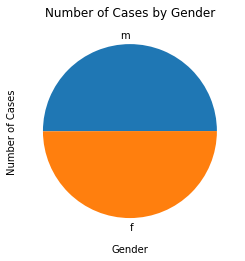

In [43]:
mh['gender'].value_counts().plot(kind='pie')
plt.ylabel('Number of Cases')
plt.xlabel('Gender')
plt.title('Number of Cases by Gender');

If we look at the genders separately, we can see that Depression and Anxiety are the main disorders both genders suffer from.

In [22]:
mh_by_gender = mh.groupby(['gender','illness']) \
                .count()

mh_by_gender.loc['f'].sort_values(by='id',ascending=False)

,id,state,ethnicity
illness,,,
Depression,102270,102270,102270
Anxiety Disorder,102055,102055,102055
Eating Disorder,61239,61239,61239
OCD,51123,51123,51123
ADHD,50763,50763,50763
Bipolar,35839,35839,35839
Other,35767,35767,35767
Schizophrenia,15233,15233,15233


In [23]:
mh_by_gender.loc['m'].sort_values(by='id',ascending=False)

,id,state,ethnicity
illness,,,
Depression,102023,102023,102023
Anxiety Disorder,101860,101860,101860
Eating Disorder,61318,61318,61318
ADHD,51490,51490,51490
OCD,51122,51122,51122
Other,35861,35861,35861
Bipolar,35749,35749,35749
Schizophrenia,15611,15611,15611


Lastly, I created a function where you can specify which illnesses you want to look at.

Name illnesses, separated by commas no spaces: 
Depression,Anxiety Disorder,Schizophrenia
input is: Depression,Anxiety Disorder,Schizophrenia
list is: ['Depression', 'Anxiety Disorder', 'Schizophrenia']


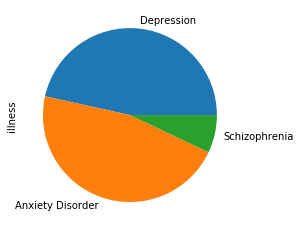

In [44]:
def disorder(*args): 
    filter_list = []
    for illness in args:
        filter_list.append(illness)
    
    disorder = mh[mh.illness.isin(filter_list)]
    disorder['illness'].value_counts().plot(kind='pie')
     

mh_illness = input('Name illnesses, separated by commas no spaces: \n')
print(f'input is: {mh_illness}')
illness_list = mh_illness.split(',')
print(f'list is: {illness_list}')
disorder(*illness_list)


# disorder('Depression', 'Schizophrenia')


## Conclusion
The majority of folks suffer from Anxiety and Depression. There doesn't seem to be a gender that suffers more from an illness over the other.

## Missing Data / Future Studies
* Age of person or duration of diagnosed illness
* On medication (what kind?) or taking holistic approach (what activities?)
* Substance Abuse factors
* Sexual orientation

## Other
If time had permitted, I would have like to analyze more in detail the different regions, and ethnicity factors.